In [1]:
import torch
from matplotlib import pyplot as plt

def plot_curve(data):
    fig = plt.figure()
    plt.plot(range(len(data)),data,color='blue')
    plt.legend(['value'],loc='upper right')
    plt.xlabel('step')
    plt.ylabel('value')
    plt.show()


def plot_image(img,label,name):
    fig=plt.figure()
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        plt.imshow(img[i][0]*0.3081+0.1307,cmap='gray',interpolation='none')
        plt.title("{}:{}".format(name,label[i].item()))
        plt.xticks([])
        plt.yticks([])
    plt.show()

def one_hot(label,depth=10):
    out = torch.zeros(label.size(0),depth)
    idx = torch.LongTensor(label).view(-1,1)
    out.scatter(dim=1,index=idx,value=1)
    return out

In [2]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim

import torchvision
from matplotlib import pyplot as plt


### step1 load dataset

In [3]:
batch_size=512
train_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('mnist data',train=True,download=True,
                                                                     transform=torchvision.transforms.Compose(
                                                                     [torchvision.transforms.ToTensor(),torchvision.transforms.Normalize(
                                                                     (0.1307,),(0.3081,))])),
                                            batch_size=batch_size,shuffle=True)

test_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('mnist data/',train=False,download=True,
                                                                     transform=torchvision.transforms.Compose(
                                                                     [torchvision.transforms.ToTensor(),torchvision.transforms.Normalize(
                                                                     (0.1307,),(0.3081,))])),
                                            batch_size=batch_size,shuffle=False)
                

torch.Size([512, 1, 28, 28]) torch.Size([512]) tensor(-0.4242) tensor(2.8215)


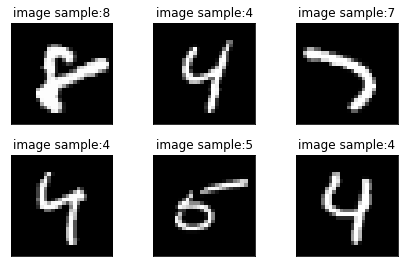

In [8]:
x,y = next(iter(train_loader))
print(x.shape,y.shape,x.min(),x.max())
plot_image(x,y,'image sample')

In [15]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        #xw+b
        self.fc1 = nn.Linear(28*28,256)
        self.fc2 = nn.Linear(256,64)
        self.fc3 = nn.Linear(64,10)
        
    def forward(self,x):
            #x: [b,1,28,28]
            #h1  = relu(h1w1+b1)
            x = F.relu(self.fc1(x))
            #h2 = relu(h1w2+b2)
            x = F.relu(self.fc2(x))
            
            # h3 = h2w3+b3
            x = self.fc3(x)
            
            return x


### step3 training

0 0 0.013872900977730751
0 10 0.006515520624816418
0 20 0.0029543740674853325
0 30 0.0021509253419935703
0 40 0.0018975321436300874
0 50 0.0016970271244645119
0 60 0.0015954507980495691
0 70 0.0015394017100334167
0 80 0.001402072375640273
0 90 0.0012175815645605326
0 100 0.0012237244518473744
0 110 0.001122541492804885


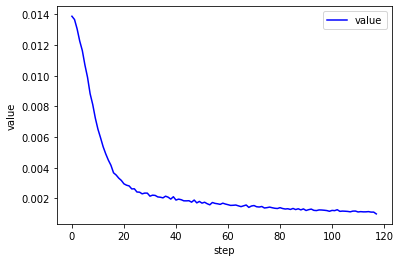

In [21]:
net = Net()
optimizer  = optim.SGD(net.parameters(),lr=0.01,momentum=0.9)

train_loss = []

for epoch in range(1):
    for batch_idx, (x,y) in enumerate(train_loader):
        
        #x:[b,1,28,28],y:[512]
        #[b,1,28,28] => [b,28*28]
        x = x.view(x.size(0),28*28)
        #=>[b,10]
        out = net(x)
        
        y_onehot = one_hot(y)
        
        #loss = mse(out,y_onehot)
        loss = F.mse_loss(out,y_onehot)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())
        if batch_idx % 10 ==0:
            print(epoch,batch_idx,loss.item())
        

plot_curve(train_loss)
        

### step4 evaluation

test acc: 0.0861


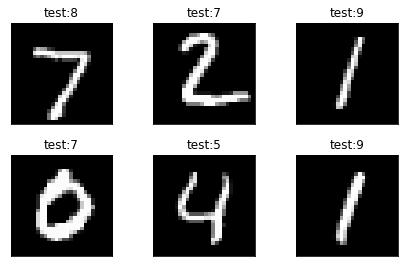

In [23]:
total_correct=0
for x,y  in test_loader:
    x = x.view(x.size(0),28*28)
    out = net(x)
    
    pred =  out.argmax(dim=1)
    correct = pred.eq(y).sum().float().item()
    total_correct+= correct
    
    
total_num = len(test_loader.dataset)
acc = total_correct/total_num
print('test acc:',acc)
    
x,y = next(iter(test_loader))    
out = net(x.view(x.size(0),28*28))
pred = out.argmax(dim=1)
plot_image(x,pred,'test')


    
    